In [14]:
!pip install --upgrade music21
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 40.4 kB/s eta 0:00:0000:0100:17


In [2]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

zsh:1: command not found: add-apt-repository
zsh:1: command not found: apt-get
zsh:1: command not found: apt-get


In [1]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [4]:
from music21 import *
us = environment.UserSettings()
# us['musescoreDirectPNGPath'] = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'
us['musescoreDirectPNGPath'] = '/usr/bin/mscore' # for colab
us['directoryScratch'] = '/tmp'

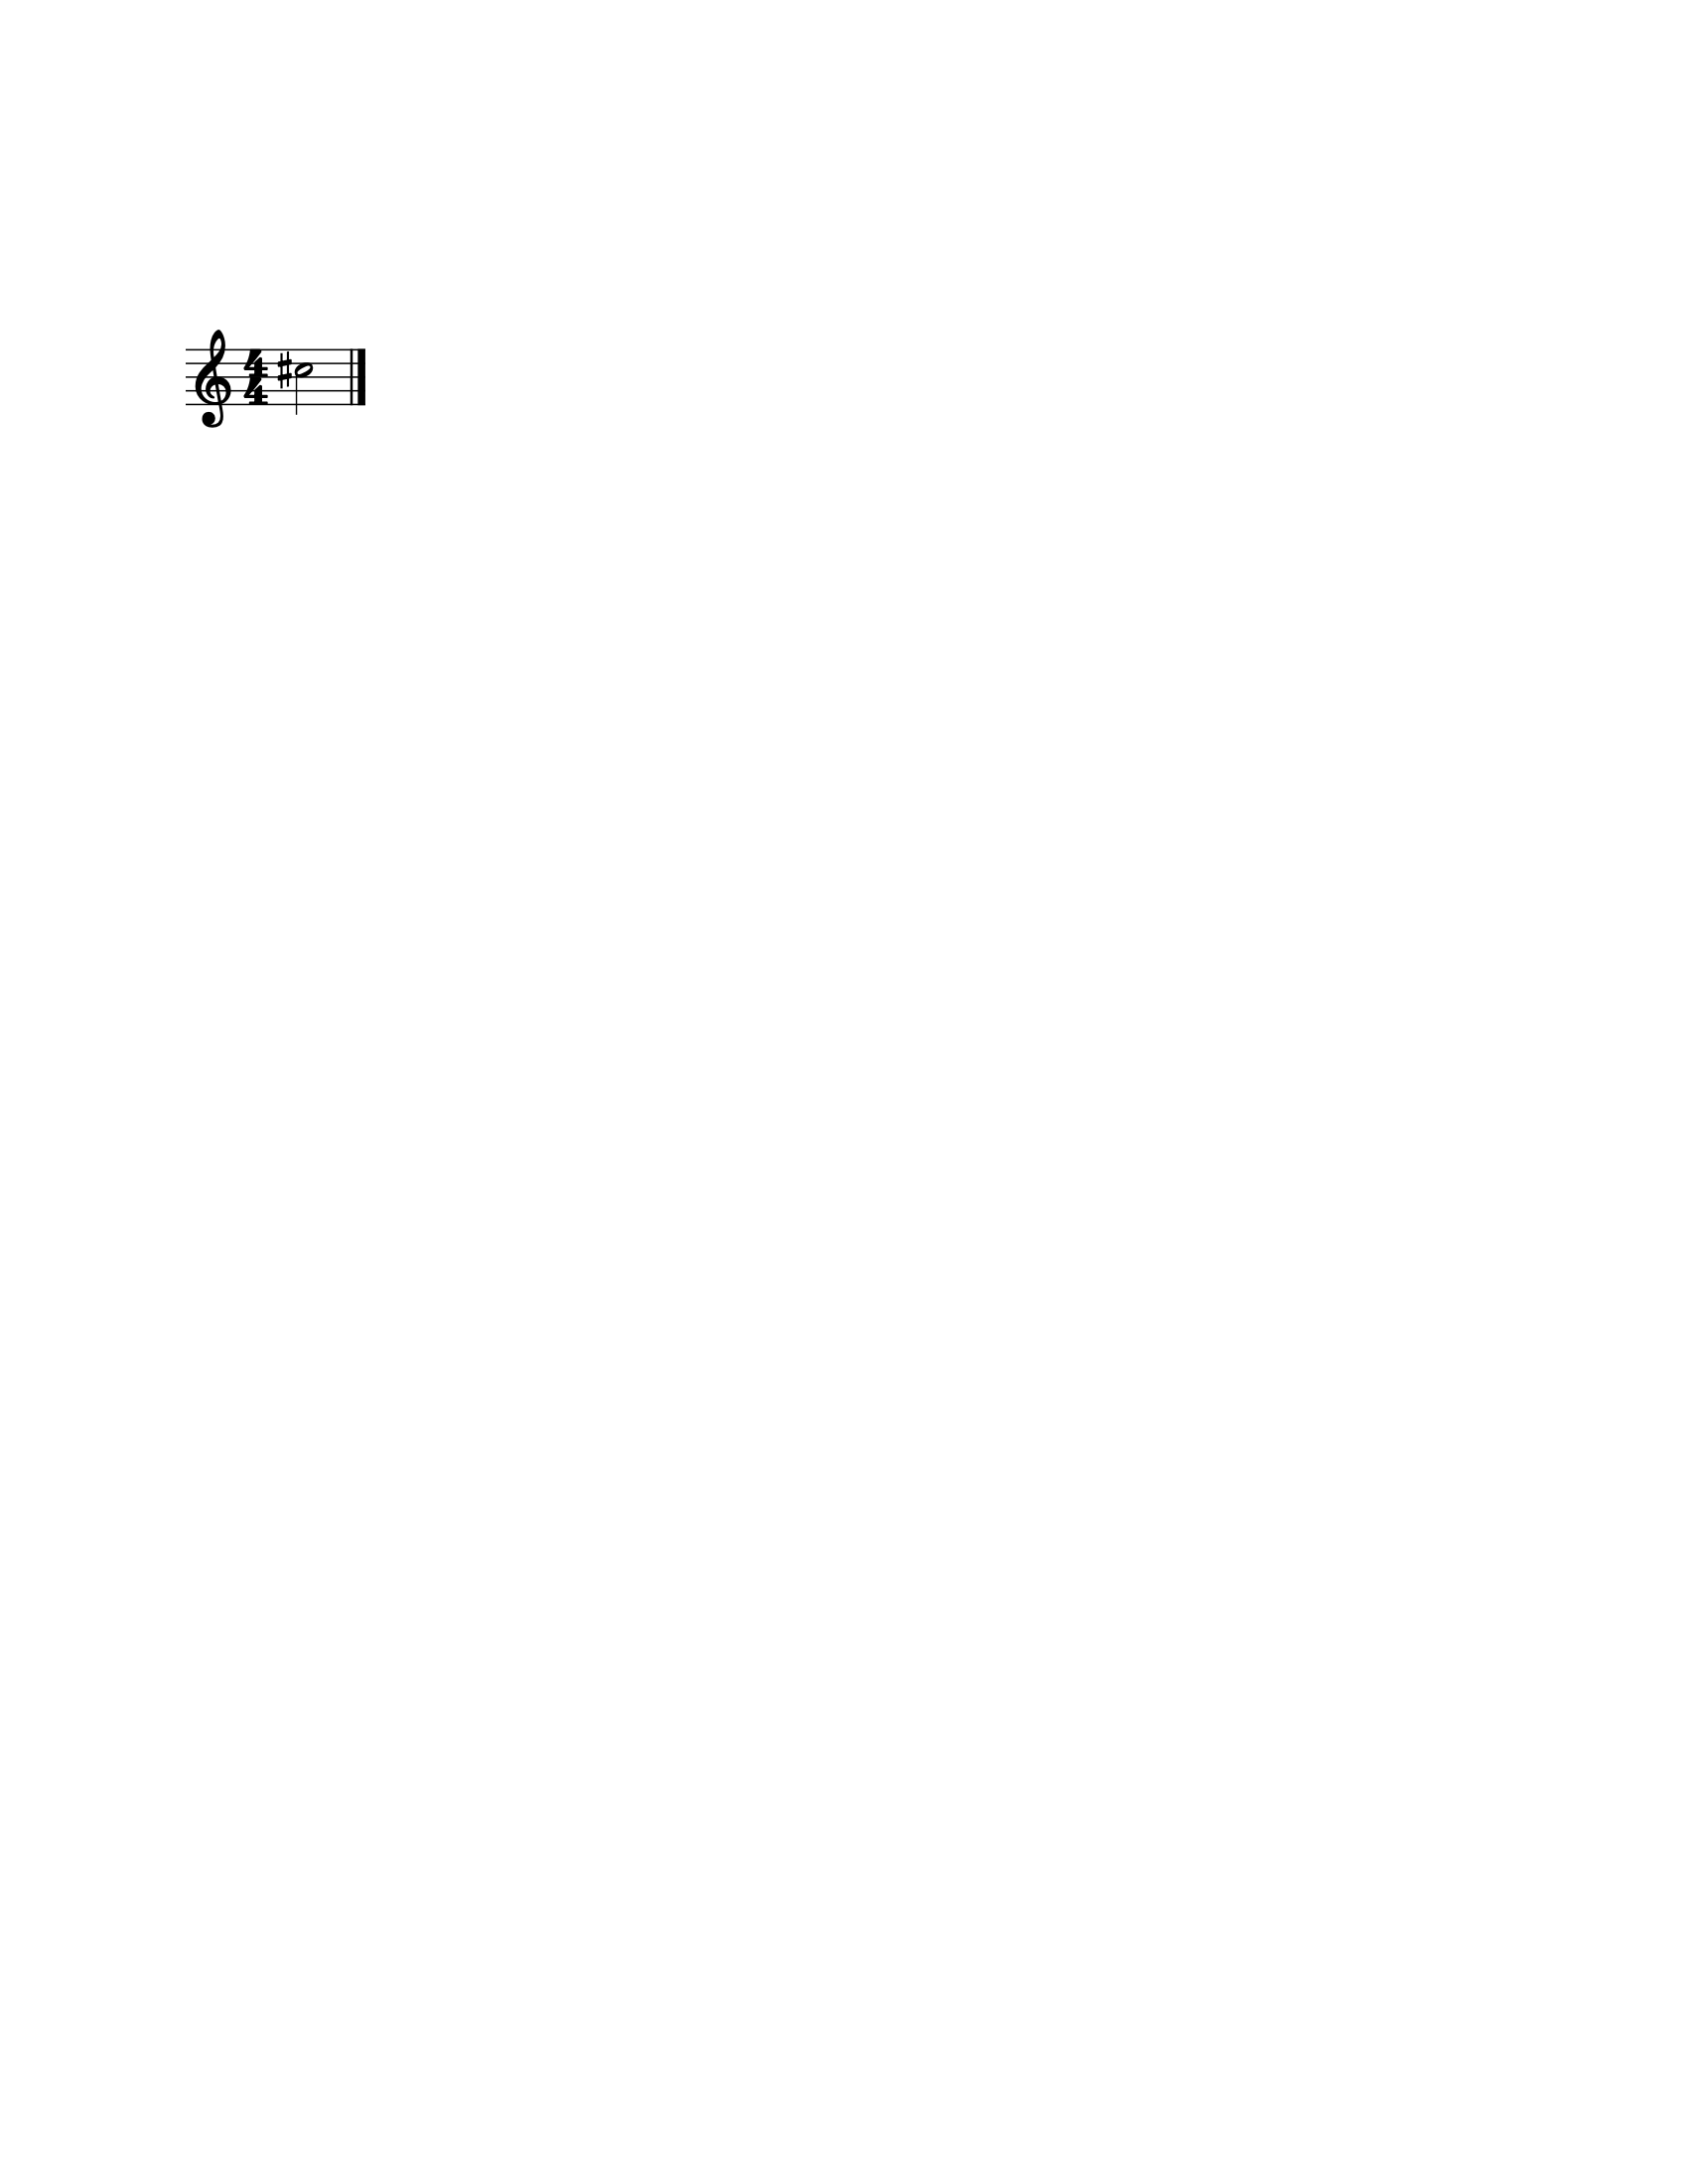

In [13]:
from music21 import *
s = stream.Stream()
n = note.Note('C#5')

dur = duration.Duration(2.0)
n.duration = dur
s.append(n)
# a series of notes
s.show()
s.show('midi')

# some things to try
# notating and listening to a short melody

In [16]:
from cosmos import SineWave, MovingSineWave, AudioTrack, play_audio

In [14]:
track = AudioTrack()
sine_1 = SineWave(frequency=220, duration=4, gain=1, pan=-1)
track.add_audio(sine_1.to_audio(), time=0)
sine_2 = SineWave(frequency=330, duration=4, gain=1, pan=1)
track.add_audio(sine_2.to_audio(), time=0)


# print
play_audio(track)

In [26]:
# Rhythmicon
# https://en.wikipedia.org/wiki/Rhythmicon
track.clear()
base_freq = 100
base_dur = 8
dur_tot = 30
num_partials = 8
for p in range(num_partials):
    freq = base_freq * (p + 1)
    dur = base_dur / (p + 1)
    pan = 2 * p / (num_partials - 1) - 1
    sine = SineWave(frequency=freq, duration=dur/2, gain=1, pan=pan)
    beats = int(dur_tot / dur)
    for b in range(beats):
        track.add_audio(sine.to_audio(), time=b * dur)
    
play_audio(track)

Audio would have clipped, had to normalize it first.


/Users/jon/anaconda3/envs/musicMaker/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7774: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


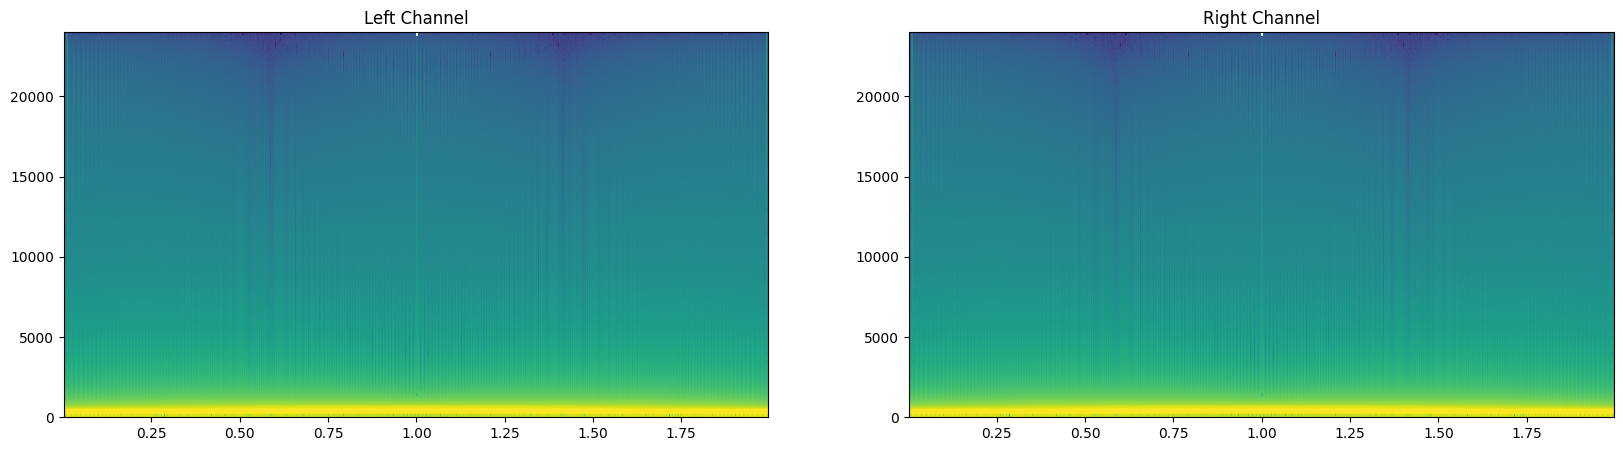

In [27]:
track = AudioTrack()
sweep = MovingSineWave()
track.add_audio(sweep.to_audio(), time=0)
track.plot_spectrogram()
play_audio(track)